# Yelp Data Challenge - NLP



## Project Goal
    
    1. Check out similar review search engine which can be used to classify the sentiment of users without user ratings explicitly 
    
    2. Based on review text data predict reviews to be positive or negative
    
    setps include:
    1. NLP representation of the text
    2. split into training and testing
    3. train Naive-Bayes, logistic regression and RF model 
    4. report ROC
    5. key features making positive/negative reviews

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('final_business.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


In [5]:
df.shape

(473382, 12)

In [7]:
df.columns.values

array(['business_id', 'name', 'categories', 'avg_stars', 'cool', 'date',
       'funny', 'review_id', 'stars', 'text', 'useful', 'user_id'], dtype=object)

In [46]:
# helper function for model evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Define features here is the text of the review

In [4]:
documents=df['text'].values

In [6]:
documents[0]

"went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try."

### Define  target variable 

#### >4 star rating as positive rating and below as negative

In [5]:
df['fav']=df['stars']>4

In [6]:
df['fav'][:5]

0     True
1     True
2     True
3    False
4     True
Name: fav, dtype: bool

In [7]:
target=df['fav'].values

In [8]:
import numpy as np

np.unique(target, return_counts=True)

(array([False,  True], dtype=bool), array([242518, 230864]))

In [ ]:
# almost half and half

## Create training dataset and test dataset

In [9]:
from sklearn.cross_validation import train_test_split

/home/nellieliu0/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Split to documents_train, documents_test, target_train, target_test
doc_train,doc_test, target_train, target_test=train_test_split(documents, target, test_size=0.8, random_state=2)

In [12]:
documents.shape

(473382,)

In [13]:
doc_train.shape

(94676,)

## Get NLP representation of the documents

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:

vectorizer=TfidfVectorizer(stop_words='english', max_features=5000)

In [16]:
# Train the model with your training data
train_matrix=vectorizer.fit_transform(doc_train).toarray()

In [20]:
# Get the vocab of your tfidf
words=vectorizer.get_feature_names()

In [21]:
words[-10:]

['younger',
 'yrs',
 'yuck',
 'yum',
 'yummy',
 'yup',
 'yuzu',
 'zero',
 'zone',
 'zucchini']

In [22]:
train_matrix.shape

(94676, 5000)

In [23]:
test_matrix=vectorizer.transform(doc_test).toarray()

In [24]:
test_matrix.shape

(378706, 5000)

## Similar review search engine

### 


    This classifer works by looking at similarities (using cosine similarity metric) can be used to classify the sentiment of users for yelp or other similar platform withou user ratings and the framework can be used for other sentiment analysis use cases

In [25]:
import numpy as np

# helper function for further analysis

def get_top_values(lst, n, labels):
    
   
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    
    return [labels[i] for i in np.argsort(lst)[:n]]


In [26]:
# use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
# Draw an arbitrary review from test (unseen in training) documents
query=[doc_test[7]]

In [28]:
print(query)

['Wow! What a total let down!\n\nSo much for "best buffet in vegas"!\n\nThe price of this buffet is pretty expensive! $40-60 depending on what meal you go for.\n\nSo I would expect something good for that huge of a price tag.\n\nHowever the only "good" thing about it is the size. It\'s pretty big; i will give them that.\n\nThe food itself is very mediocre in quality. What is the point of having "500 dishes" when most of them are taste awful.\n\nSome of the "hot" dishes were served totally cold!\n\nJust walking by a lot of the food didn\'t look appealing. \n\nMe and my friend left hungry and disappointed. I\'ve never left a buffet hungry before. Total waste of money! \n\nPlease use the same money and dine any restaurant in vegas; you will thank me later! \n\nIf you must have an all-you-can eat meal than go to fogo de chao and get quality food and leave happy!']


In [ ]:
# definitely a negative review

In [29]:
# Transform the drawn review(s) to vector(s)
query_matrix=vectorizer.transform(query).toarray()


In [35]:
query_matrix.shape

(1, 5000)

In [30]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores=cosine_similarity(query_matrix,train_matrix)

In [33]:
# Let's find top 5 similar reviews
n = 5
top_reviews=get_top_values(similarity_scores[0], n, doc_train)

In [ ]:
print('Our search query:')
print(query) 

In [37]:
print('Most %s similar reviews:' % n)
for i, review in enumerate(top_reviews):
    print('#%s:' % i)
    print(review)

Most 5 similar reviews:
#0:
This buffet surpassed even what I've come to expect from the money hungry MGM corporation. Some of the most unappetizing food I've ever seen at a buffet. Low quality ingredients, everything dry and tasteless. Avoid.
#1:
This buffet is not that good for breakfast. The only good thing is probably the the crepes bar, but nothing to special. Do not waste your money for this quality of food
#2:
food was cold, and service was bad.   We went for lunch and it was a total disappointment. Not only was their food cold but it tasted horrible.  the beef tasted old and expired, their pasta had no flavor and even their dessert s were bad.  This was a total waste of my money and time.  Worst buffet food I have had.
#3:
Loved this buffet! We came on the buffet of buffet pass and didn't upgrade to the seafood buffet and it was worth every second. We had it for the dinner buffet and everything we had was amazing. There was a wide range of food and everything was hot and tasted

In [ ]:
# most of the results review seem reasonably similar to the example

## Classifying positive/negative review

### I am not only interested in the performance of positive/negative classification but also how to use the models to find top features for both positive and negative predictions

#### Naive-Bayes Classifier

In [38]:
# Build a Naive-Bayes
from sklearn.naive_bayes import MultinomialNB

clt_nb=MultinomialNB()
clt_nb.fit(train_matrix,target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
# Get score for training set
clt_nb.score(train_matrix, target_train)   #accuracy score

0.81721872491444503

In [41]:
target_train[:5]

array([False, False, False, False,  True], dtype=bool)

In [42]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [43]:
roc_auc_score(target_train,clt_nb.predict(train_matrix))

0.81809018229803687

In [44]:
roc_auc_score(target_test,clt_nb.predict(test_matrix))

0.81060411992942327

In [45]:
# Get score from test set
clt_nb.score(test_matrix, target_test)

0.80984721657433467

In [52]:
target_train.shape

(94676,)

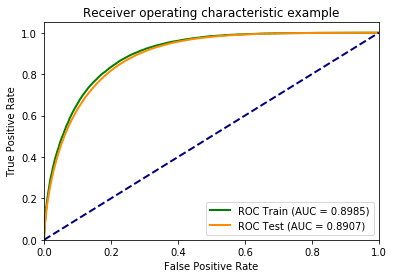

In [54]:
plot_roc_curve(target_train,clt_nb.predict_proba(train_matrix)[:,1],target_test,clt_nb.predict_proba(test_matrix)[:,1])

In [ ]:
# looks good to me using NB classifier

#### Logistic Regression Classifier

In [55]:
# Build a Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
clt_lg=LogisticRegression()
clt_lg.fit(train_matrix,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# Get score for training set
clt_lg.score(train_matrix,target_train)

0.85044784317039168

In [57]:
roc_auc_score(target_train,clt_lg.predict(train_matrix))

0.8507323243227668

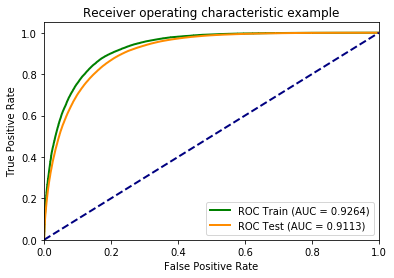

In [58]:
plot_roc_curve(target_train,clt_lg.predict_proba(train_matrix)[:,1],target_test,clt_lg.predict_proba(test_matrix)[:,1])

In [59]:
# Get score for test set
clt_lg.score(test_matrix, target_test)

0.83172698610531648

In [65]:
clt_lg.coef_[0].shape

(5000,)

#### The key features(words) that make the positive prediction

In [61]:
len(words)

5000

In [66]:
# Let's find it out by ranking
n = 20
get_top_values(clt_lg.coef_[0],n,words)

['amazing',
 'best',
 'thank',
 'delicious',
 'fantastic',
 'incredible',
 'awesome',
 'heaven',
 'great',
 'excellent',
 'perfection',
 'perfect',
 'love',
 'phenomenal',
 'favorite',
 'highly',
 'wow',
 'die',
 'bomb',
 'outstanding']

#### Key features(words) that make the negative prediction

In [67]:
# Let's find it out by ranking
n = 20
get_bottom_values(clt_lg.coef_[0],n,words)

['worst',
 'ok',
 'okay',
 'rude',
 'horrible',
 'slow',
 'disappointing',
 'mediocre',
 'bland',
 'terrible',
 'overpriced',
 'dry',
 'average',
 'reason',
 'poor',
 'wasn',
 'lacking',
 'wouldn',
 'decent',
 'charged']

A: similarily to last finding , most of them look negative to me

#### Random Forest Classifier

In [68]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clt_rf=RandomForestClassifier(max_depth=20,n_estimators=50,min_samples_leaf=10, n_jobs=-1)
clt_rf.fit(train_matrix,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
# Get score for training set
clt_rf.score(train_matrix,target_train)

0.80298069204444633

In [70]:
# not as good as NB or logistic regression

In [71]:
roc_auc_score(target_train,clt_rf.predict(train_matrix))

0.80334111501329353

In [72]:
clt_rf.score(test_matrix,target_test)

0.78581538185294131

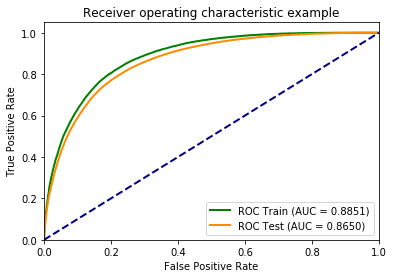

In [73]:
plot_roc_curve(target_train,clt_rf.predict_proba(train_matrix)[:,1],target_test,clt_rf.predict_proba(test_matrix)[:,1])

In [75]:
clt_rf.feature_importances_.shape

(5000,)

#### Feature importance from the RFC model

In [76]:
n = 20
get_top_values(clt_rf.feature_importances_,n,words)

['amazing',
 'best',
 'delicious',
 'great',
 'worst',
 'didn',
 'love',
 'ok',
 'highly',
 'definitely',
 'vegas',
 'horrible',
 'like',
 'just',
 'wasn',
 'rude',
 'asked',
 'bad',
 'pretty',
 'terrible']

### 

To find top words that make positive/negative ratings, here I used two ways. One way is to look at coefficients from the logistic regression by ranking them, as top 10 coefficients correspond to features that are more likely to be positive related, and vice versa. RF has an advatage by giving feature importance orderly. Among the two sets of feature importance , there are definitely some overlaps and some difference.